# Object Detection Tutorial

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/georgia-tech-db/eva/blob/master/tutorials/02-object-detection.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run on Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/georgia-tech-db/eva/blob/master/tutorials/02-object-detection.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a>
  </td>
  <td>
    <a target="_blank" href="https://raw.githubusercontent.com/georgia-tech-db/eva/master/tutorials/02-object-detection.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" /> Download notebook</a>
  </td>
</table>

### Start EVA server

We are reusing the start server notebook for launching the EVA server.

In [1]:
#!wget -nc "https://raw.githubusercontent.com/georgia-tech-db/eva/master/tutorials/00-start-eva-server.ipynb"
%run 00-start-eva-server.ipynb
cursor = connect_to_server()

kill: usage: kill [-s sigspec | -n signum | -sigspec] pid | jobspec ... or kill -l [sigspec]
rm: nohup.out: No such file or directory
cat: nohup.out: No such file or directory
22/11/24 16:42:52 WARN Utils: Your hostname, Jiachengs-MacBook-Air-2.local resolves to a loopback address: 127.0.0.1; using 10.180.244.24 instead (on interface en0)
22/11/24 16:42:52 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
22/11/24 16:42:52 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
11-24-2022 16:42:54 WARNING[create_udf_executor:create_udf_executor.py:exec:0042] UDF FastRCNNObjectDetector already exists, nothing added.
11-24-2022 16:42:54 WARNING[create_udf_executor:create_udf_executor.py:exec:00


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Getting the Video Files

In [2]:
# Getting the video files
!wget -nc https://www.dropbox.com/s/ljx2ejva1aztumg/1.mp4
# Getting the FastRCNN object detector
#!wget -nc https://raw.githubusercontent.com/georgia-tech-db/eva/master/eva/udfs/fastrcnn_object_detector.py
import fastrcnn_object_detector
import ocr_extractor

File ‘1.mp4’ already there; not retrieving.



/Users/jiachengshang/CS4420/4420Project/test_eva_db/lib/python3.9/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: dlopen(/Users/jiachengshang/CS4420/4420Project/test_eva_db/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libpng16.16.dylib
  Referenced from: /Users/jiachengshang/CS4420/4420Project/test_eva_db/lib/python3.9/site-packages/torchvision/image.so
  Reason: tried: '/Users/malfet/miniforge3/envs/py_39_torch-1.10.2/lib/libpng16.16.dylib' (no such file), '/Users/malfet/miniforge3/envs/py_39_torch-1.10.2/lib/libpng16.16.dylib' (no such file), '/Users/malfet/miniforge3/envs/py_39_torch-1.10.2/lib/libpng16.16.dylib' (no such file), '/Users/malfet/miniforge3/envs/py_39_torch-1.10.2/lib/libpng16.16.dylib' (no such file), '/Users/jiachengshang/miniconda3/lib/libpng16.16.dylib' (no such file), '/Users/jiachengshang/miniconda3/lib/libpng16.16.dylib' (no such file), '/Users/jiachengshang/miniconda3/lib/pyt

### Load the surveillance videos for analysis

In [3]:
cursor.execute('DROP TABLE ObjectDetectionVideos')
response = cursor.fetch_all()
print(response)
cursor.execute('LOAD FILE "1.mp4" INTO ObjectDetectionVideos;') # for other machines delete "/tutorials"
response = cursor.fetch_all()
print(response)

@status: 0
@batch: Batch Object:
@dataframe:                                                    0
0  Table Successfully dropped: ObjectDetectionVideos
@batch_size: 1
@identifier_column: None
@query_time: 0.034035292000002215
@status: 0
@batch: Batch Object:
@dataframe:                                              0
0  Video successfully added at location: 1.mp4
@batch_size: 1
@identifier_column: None
@query_time: 0.03603574999999992


11-24-2022 16:43:11 ERROR [drop_executor:drop_executor.py:exec:0059] Failed to drop TABLE REF:: ( ObjectDetectionVideos SAMPLE FREQUENCY None)
NoneType: None


### Visualize Video

In [34]:
from ipywidgets import Video
Video.from_file("1.mp4", embed=True)

Video(value=b'\x00\x00\x00\x1cftypmp42\x00\x00\x00\x01isommp41mp42\x00\x00\x00\x01mdat\x00\x00\x00\x00...')

In [7]:
cursor.execute("DROP UDF FastRCNNObjectDetector;")
response = cursor.fetch_all()
print(response)

@status: 0
@batch: Batch Object:
@dataframe:                                                  0
0  UDF FastRCNNObjectDetector successfully dropped
@batch_size: 1
@identifier_column: None
@query_time: 0.12966137499995511


### Optional - Register FasterRCNN (object detection) model into EVA 

#### Syntax
  
  `CREATE UDF [ IF NOT EXISTS ] <name> 
      INPUT  ( [ <arg_name> <arg_data_type> ] [ , ... ] )
      OUTPUT ( [ <result_name> <result_data_type> ] [ , ... ] )
      TYPE  <udf_type_name>
      IMPL  '<path_to_implementation>'`

#### Required Parameters
`<name>` - specifies the unique identifier for the UDF.

`[ <arg_name> <arg_data_type> ] [ , ... ]` - specifies the name and data type of the udf input arguments. Name is kept for consistency (ignored by eva right now), arguments data type is required. `ANYDIM` means the shape is inferred at runtime.

`[ <result_name> <result_data_type> ] [ , ... ]` - specifies the name and data type of the udf output arguments. 
Users can access a specific output of the UDF similar to access a column of a table. Eg. `<name>.<result_name>` 

`<udf_type_name>` - specifies the identifier for the type of the UDF. UDFs of the same type are assumed to be interchangeable. They should all have identical input and output arguments. For example, object classification can be one type. 

`<path_to_implementation>` - specifies the path to the implementation class for the UDF

In [8]:
cursor.execute("""CREATE UDF IF NOT EXISTS FastRCNNObjectDetector
      INPUT  (frame NDARRAY UINT8(3, ANYDIM, ANYDIM))
      OUTPUT (labels NDARRAY STR(ANYDIM), bboxes NDARRAY FLOAT32(ANYDIM, 4),
                scores NDARRAY FLOAT32(ANYDIM))
      TYPE  Classification
      IMPL  'fastrcnn_object_detector.py';
      """) # for other machines delete "tutorials/"
response = cursor.fetch_all()
print(response)

@status: 0
@batch: Batch Object:
@dataframe:                                                    0
0  UDF FastRCNNObjectDetector successfully added ...
@batch_size: 1
@identifier_column: None
@query_time: 0.7634888750000073


### Run Object detector on the video

In [9]:
cursor.execute("""SELECT id, FastRCNNObjectDetector(data) 
                  FROM ObjectDetectionVideos 
                  WHERE id < 1""")
response = cursor.fetch_all()
print(response)

@status: -1
@batch: None
@error: ('prediction labels: ', tensor([ 3,  3,  3,  3, 64, 64,  1, 64, 64,  3,  8,  1,  3,  3]))


11-24-2022 16:54:13 WARNING[command_handler:command_handler.py:handle_request:0075] ('prediction labels: ', tensor([ 3,  3,  3,  3, 64, 64,  1, 64, 64,  3,  8,  1,  3,  3]))


### Visualize output of Object detector on the video

In [14]:
import cv2
from pprint import pprint
from matplotlib import pyplot as plt

def annotate_video(detections, input_video_path, output_video_path):
    color1=(207, 248, 64)
    color2=(255, 49, 49)
    thickness=4

    vcap = cv2.VideoCapture(input_video_path)
    width = int(vcap.get(3))
    height = int(vcap.get(4))
    fps = vcap.get(5)
    fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v') #codec
    video=cv2.VideoWriter(output_video_path, fourcc, fps, (width,height))

    frame_id = 0
    # Capture frame-by-frame
    # ret = 1 if the video is captured; frame is the image
    ret, frame = vcap.read()
    car_positions = []

    while ret:
        df = detections
        df = df[['fastrcnnobjectdetector.bboxes', 'fastrcnnobjectdetector.labels']][df.index == frame_id]
        if df.size:
            dfLst = df.values.tolist()
            for bbox, label in zip(dfLst[0][0], dfLst[0][1]):
                x1, y1, x2, y2 = bbox
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                # object bbox
                img=cv2.rectangle(frame, (x1, y1), (x2, y2), color1, thickness) 
                # object label
                cv2.putText(img, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 10, color1, thickness) 
                # frame label
                cv2.putText(img, 'Frame ID: ' + str(frame_id), (700, 500), cv2.FONT_HERSHEY_SIMPLEX, 1.2, color2, thickness)
                if label == "car": car_positions.append(bbox) 
            video.write(img)

            # Show every fifth frame
            if frame_id % 5 == 0:
                plt.imshow(img)
                plt.show()
        
        frame_id+=1
        ret, frame = vcap.read()

    video.release()
    vcap.release()
    return car_positions

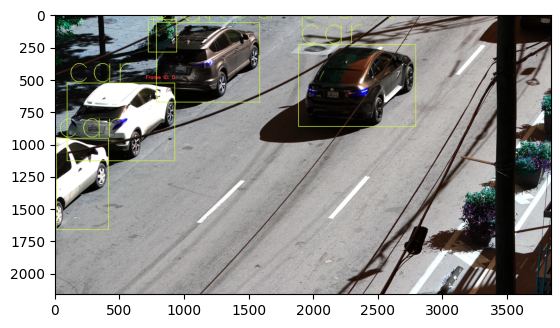

[[93.467010498, 532.616027832, 925.0687866211, 1132.9525146484], [11.998509407, 958.4506835938, 413.6780090332, 1663.9011230469], [1881.4766845703, 234.4310913086, 2787.0285644531, 867.0529174805], [783.7587890625, 64.0740890503, 1581.4468994141, 679.0065307617]]


Video(value=b'\x00\x00\x00\x1cftypisom\x00\x00\x02\x00isomiso2mp41\x00\x00\x00\x08free\x00\x07\n>...')

In [10]:
from ipywidgets import Video, Image
input_path = '1.mp4'
output_path = 'video.mp4'

dataframe = response.batch.frames
positions = annotate_video(dataframe, input_path, output_path)
print(positions)
Video.from_file(output_path)

In [11]:
def crop_cars(positions, input_video_path):
    vcap = cv2.VideoCapture(input_video_path)
    ret, frame = vcap.read()
    if ret:
        for i in range(len(positions)):
            fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
            fps = vcap.get(5)
            width = abs(int(positions[i][2]) - int(positions[i][0]))
            height = abs(int(positions[i][3]) - int(positions[i][1]))
            video=cv2.VideoWriter("temp_" + str(i) + ".mp4", fourcc, fps, (width,height))
            img = frame[min(int(positions[i][3]),int(positions[i][1])):max(int(positions[i][3]),int(positions[i][1])),
            min(int(positions[i][2]),int(positions[i][0])):max(int(positions[i][2]),int(positions[i][0]))]
            for _ in range(50): video.write(img)
            video.release()

In [13]:
crop_cars(positions, "1.mp4")

In [21]:
cursor.execute("""CREATE UDF IF NOT EXISTS OCRExtractor
      INPUT  (frame NDARRAY UINT8(3, ANYDIM, ANYDIM))
      OUTPUT (labels NDARRAY STR(ANYDIM), bboxes NDARRAY FLOAT32(ANYDIM, 4),
                scores NDARRAY FLOAT32(ANYDIM))
      TYPE  Classification
      IMPL  'ocr_extractor.py';
      """)
response = cursor.fetch_all()
print(response)

11-24-2022 16:24:27 WARNING[create_udf_executor:create_udf_executor.py:exec:0042] UDF OCRExtractor already exists, nothing added.


@status: 0
@batch: Batch Object:
@dataframe:                                                  0
0  UDF OCRExtractor already exists, nothing added.
@batch_size: 1
@identifier_column: None
@query_time: 0.3976027920002707


In [22]:
for i in range(len(positions)): #change later
    file_name = 'temp_' + str(i) + '.mp4'
    cursor.execute('DROP TABLE ObjectDetectionVideos')
    response = cursor.fetch_all()
    print(response)
    cursor.execute('LOAD FILE "' + file_name + '" INTO ObjectDetectionVideos;')
    response = cursor.fetch_all()
    print(response)
    cursor.execute("""SELECT id, OCRExtractor(data) 
                  FROM ObjectDetectionVideos 
                  WHERE id < 1""")
    response = cursor.fetch_all()
    print(response)

11-24-2022 16:24:35 ERROR [drop_executor:drop_executor.py:exec:0059] Failed to drop TABLE REF:: ( ObjectDetectionVideos SAMPLE FREQUENCY None)
NoneType: None


@status: 0
@batch: Batch Object:
@dataframe:                                                    0
0  Table Successfully dropped: ObjectDetectionVideos
@batch_size: 1
@identifier_column: None
@query_time: 0.35675866700012193
@status: 0
@batch: Batch Object:
@dataframe:                                                   0
0  Video successfully added at location: temp_0.mp4
@batch_size: 1
@identifier_column: None
@query_time: 0.25338908399999127


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


@status: 0
@batch: Batch Object:
@dataframe:    objectdetectionvideos.id ocrextractor.labels  \
0                         0        [78col7726]]   

                                 ocrextractor.bboxes     ocrextractor.scores  
0  [[[163, 337], [249, 337], [249, 373], [163, 37...  [0.050281150600000005]  
@batch_size: 1
@identifier_column: None
@query_time: 7.267124500000136
@status: 0
@batch: Batch Object:
@dataframe:                                                    0
0  Table Successfully dropped: ObjectDetectionVideos
@batch_size: 1
@identifier_column: None
@query_time: 0.00818041600041397
@status: 0
@batch: Batch Object:
@dataframe:                                                   0
0  Video successfully added at location: temp_1.mp4
@batch_size: 1
@identifier_column: None
@query_time: 0.018127875000118365


11-24-2022 16:24:43 ERROR [drop_executor:drop_executor.py:exec:0059] Failed to drop TABLE REF:: ( ObjectDetectionVideos SAMPLE FREQUENCY None)
NoneType: None
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


@status: 0
@batch: Batch Object:
@dataframe:    objectdetectionvideos.id ocrextractor.labels ocrextractor.bboxes  \
0                         0                  []                  []   

  ocrextractor.scores  
0                  []  
@batch_size: 1
@identifier_column: None
@query_time: 4.6083550000003015
@status: 0
@batch: Batch Object:
@dataframe:                                                    0
0  Table Successfully dropped: ObjectDetectionVideos
@batch_size: 1
@identifier_column: None
@query_time: 0.005770792000021174
@status: 0
@batch: Batch Object:
@dataframe:                                                   0
0  Video successfully added at location: temp_2.mp4
@batch_size: 1
@identifier_column: None
@query_time: 0.016069041999799083


11-24-2022 16:24:47 ERROR [drop_executor:drop_executor.py:exec:0059] Failed to drop TABLE REF:: ( ObjectDetectionVideos SAMPLE FREQUENCY None)
NoneType: None
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


@status: 0
@batch: Batch Object:
@dataframe:    objectdetectionvideos.id ocrextractor.labels  \
0                         0         [6NR247A |]   

                                 ocrextractor.bboxes ocrextractor.scores  
0  [[[225, 367], [308, 367], [308, 406], [225, 40...      [0.0079536524]  
@batch_size: 1
@identifier_column: None
@query_time: 7.795327791000091
@status: 0
@batch: Batch Object:
@dataframe:                                                    0
0  Table Successfully dropped: ObjectDetectionVideos
@batch_size: 1
@identifier_column: None
@query_time: 0.00797808300012548
@status: 0
@batch: Batch Object:
@dataframe:                                                   0
0  Video successfully added at location: temp_3.mp4
@batch_size: 1
@identifier_column: None
@query_time: 0.016467083000407


11-24-2022 16:24:55 ERROR [drop_executor:drop_executor.py:exec:0059] Failed to drop TABLE REF:: ( ObjectDetectionVideos SAMPLE FREQUENCY None)
NoneType: None
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


@status: 0
@batch: Batch Object:
@dataframe:    objectdetectionvideos.id ocrextractor.labels  \
0                         0          [ree63le]]   

                                 ocrextractor.bboxes ocrextractor.scores  
0  [[[145, 345], [232, 345], [232, 383], [145, 38...      [0.0372148457]  
@batch_size: 1
@identifier_column: None
@query_time: 5.448729207999804


In [ ]:
cursor.execute("""CREATE UDF IF NOT EXISTS OCRExtractor
      INPUT  (frame NDARRAY UINT8(3, ANYDIM, ANYDIM))
      OUTPUT (labels NDARRAY STR(ANYDIM), bboxes NDARRAY FLOAT32(ANYDIM, 4),
                scores NDARRAY FLOAT32(ANYDIM))
      TYPE  Classification
      IMPL  'tutorials/ocr_extractor.py';
      """)
response = cursor.fetch_all()
print(response)

In [ ]:
cursor.execute("DROP UDF FastRCNNObjectDetector;")
response = cursor.fetch_all()
print(response)

### Dropping a udf
simply enter command `drop udf udf_name`

In [ ]:
cursor.execute("DROP UDF FastRCNNObjectDetector;")
response = cursor.fetch_all()
print(response)

### Dropping a udf
simply enter command `drop udf udf_name`

In [42]:
cursor.execute("DROP UDF FastRCNNObjectDetector;")
response = cursor.fetch_all()
print(response)

@status: 0
@batch: Batch Object:
@dataframe:                                        0
0  UDF OCRExtractor successfully dropped
@batch_size: 1
@identifier_column: None
@query_time: 0.03344349999952101
